# Simple Face Mask Detection - Q1

**Introduction**

In this notebook, we will be evaluating your basic image/video data pre-processing and computer vision based modeling skills. You will be evaluated under three key ares in any computer vision task namely,

- Basic Preprocessing Techniques
- Basic Model Developement
- Basic Inference Techniques

**Task Description**

With the covid-19 pandemic face mask detection is a very common problem nowdays in industry with many differnt solutions. Computer vision based solutions are still capable of identifying face masks in both still images and videos rather than other solutions. Developers suggested and developed many libraries and APIs to detect face masks using computer vision. In this notebook you will be asked to develop a simple face mask detection algorithm using computer vision.

**Dataset Description**

You can use Q4 Dataset.zip to get the datatset for this task. Dataset contains images for two different classes which are masked faces and without masked faces.

- Mased faces - A folder contains 5000 face images with mask.
- Without Mased faces - A folder contains 5000 face images without mask.

**Code Structure**

Complete task is divided into three sepearte areas that are mentioned in **Introduction** section. You need to develop sepearte *python fucntions* to each functionality and wrap them up in one *python class* for each section. You may given predefined functions which are expected to be implemented by you and carry more weight on the final score. hence **DO NOT** remove those functions yet you can add any additional functions as you need.

**Hint: You have to create 3 sepearte classes for each key area and wrap all the functions within those classes as needed**

In [244]:
# Sample Class

class TestClass_1:
    
    def __init__(self):
        pass
    
    def method_1(self, parameter_1):
        pass
    
    def method_2(self, parameter_2):
        pass

    # There can be many methods
    
    def method_3(self, parameter_3):
        pass

### Basic Preprocessing Techniques

There are many vision based preprocessing techniques are out there. You will be asked to apply basic techniques such as,
- Input images/videos and read them
- Change color channels
- Crop, Resize etc

In [245]:
# Importing required libraries

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Any additional libraries go under here
# import ...

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image

import pathlib

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [246]:
class BasicPreprocessing:
    
    def __init__(self):
        pass
    
    def import_dataset(self,dir_path):
        return dir_path
        
    
    def bgr_2_gray(self,image):
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray_image
    
    def resize(self,img, img_height,img_width):
        image_resize = tf.image.resize(img, (img_height,img_width))
        return image_resize
     
    def normalize(self,ds):
        
        normalization_layer = layers.Rescaling(1./255)
        normalized_ds = ds.map(lambda x, y: (normalization_layer(x), y))
        return normalized_ds
     
    
    def cate_to_dummy(self):
        """
        Method
        ------
            Perform one-hot encoding or any other encoding method to convert categorical data into numbers.
        
        Parameters
        ----------
            As required
          
        """
        pass
    
    def reshape_data(self):
        """
        Method
        ------
            Perform reshaping functions to reshape data in a way that a model can take.
        
        Parameters
        ----------
            As required
          
        """
        pass
    
    def train_test(self,dir_path,color_signal,resize_parameters,batch_size):
        
        train_ds = tf.keras.utils.image_dataset_from_directory(
            dir_path,
            validation_split=0.2,
            subset="training",
            color_mode= color_signal,
            seed=123,
            image_size=resize_parameters,
            batch_size=batch_size)
        
        test_ds = tf.keras.utils.image_dataset_from_directory(
            dir_path,
            validation_split=0.2,
            subset="validation",
            color_mode= color_signal,
            seed=123,
            image_size=resize_parameters,
            batch_size=batch_size)
        
        return train_ds, test_ds
        
        
      
    # do cross validation 
    
          
        
    

    # All other customized methods go under here
    
    def any_name(self):
        pass

### Basic Model Development

There are many ways that you can develop either a machine learing model or deep learning model. Also you can use pretrained models like Resnet50, VGG16, VGG19 etc. But under this task you will be asked to develop a simple model without using any pretrained model.

**Hint: Use tensorflow, pytorch or any ML framework you are comfortable with to extract features**

In [247]:
class ModelDevelopment:
    
    def __init__(self):
        pass
    
    def extract_image_features(self,number_of_class):
        
        model = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        
        return model
    
    def train_model(self, model,train_ds,test_ds):
        model_1 = model
        
        model_compile  = model_1.compile(
                                    optimizer="rmsprop",
                                    loss="sparse_categorical_crossentropy",
                                    metrics=["sparse_categorical_accuracy"],
                                    )
        
     
        
        return model_compile
      
               
    
    def test_model(self,model,train_ds,test_ds,epochs):
        
        history   = model.fit(
                            train_ds,
                            validation_data=test_ds,
                            epochs= epochs
                            )
        
        
        return history
        
        
        
        
               
        return history
       
    
    def plot_graphs(self,history_1,epochs ):
        
        history = history_1   
        
        acc = history.history['sparse_categorical_accuracy']
        val_acc = history.history['val_sparse_categorical_accuracy']
        
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        epochs_range = range(epochs)
        
        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show() 
        
        return acc
       

    # All other customized methods go under here
    
    def any_name(self):
        pass

### Basic Inference Techniques

In here you will be asked to develop a detection method to detect masked faces in static images.

In [248]:
class BasicInference:
    
    def __init__(self):
        pass
    
    def detect_images(self,gray_image,class_names,model):
        # plt.imshow(image)
        image  = tf.keras.utils.img_to_array(gray_image)
        image =  tf.expand_dims(image, 0)
        
        
        predictions = model.predict(image)
        score = tf.nn.softmax(predictions[0])
        
        print(
            "This image most likely belongs to {} with a {:.2f} percent confidence."
            .format(class_names[np.argmax(score)], 100 * np.max(score))
            )
        
        pass
    
    
    # All other customized methods go under here
    
    def any_name(self):
        pass

Found 7553 files belonging to 2 classes.
Using 6043 files for training.
Found 7553 files belonging to 2 classes.
Using 1510 files for validation.
['with_mask', 'without_mask']
Epoch 1/20
189/189 [==============================] - 197s 1s/step - loss: 0.6465 - sparse_categorical_accuracy: 0.6424 - val_loss: 0.4810 - val_sparse_categorical_accuracy: 0.7583
Epoch 2/20
189/189 [==============================] - 187s 990ms/step - loss: 0.3876 - sparse_categorical_accuracy: 0.8236 - val_loss: 0.4358 - val_sparse_categorical_accuracy: 0.7821
Epoch 3/20
189/189 [==============================] - 188s 991ms/step - loss: 0.2823 - sparse_categorical_accuracy: 0.8784 - val_loss: 0.2920 - val_sparse_categorical_accuracy: 0.8583
Epoch 4/20
189/189 [==============================] - 188s 992ms/step - loss: 0.2458 - sparse_categorical_accuracy: 0.8957 - val_loss: 0.2128 - val_sparse_categorical_accuracy: 0.9192
Epoch 5/20
189/189 [==============================] - 203s 1s/step - loss: 0.2198 - sparse_

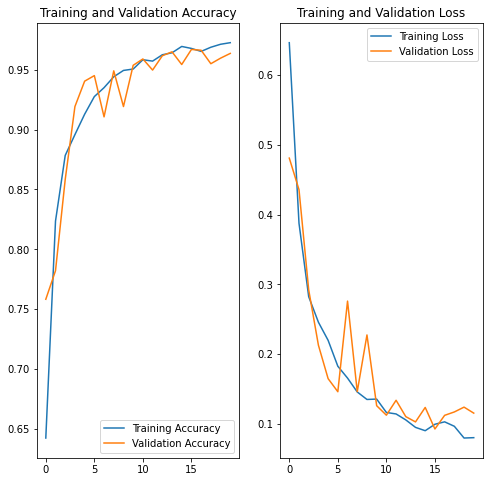

This image most likely belongs to with_mask with a 57.61 percent confidence.
Rootcode AI - Internship Practical (Computer Vision)


In [249]:
# You can use this space to play with classes and implement the main() fucntion

def main():
    
    # Define the instances
    a = BasicPreprocessing()
    b = ModelDevelopment()
    c = BasicInference()
    
    # data path
    
    data_dir = a.import_dataset('Q4 Dataset/data')
    
    
   
    # Training and testing sets 
    batch_size = 32 
    
    train_ds,test_ds = a.train_test(data_dir,'grayscale',(128,128),batch_size)
    
    # Normalizing the training data
    train_nds = a.normalize(train_ds)
    test_nds = a.normalize(test_ds)
    
    
    class_names = train_ds.class_names
    print(class_names)
    
    # Extracting features using Convolution
    num_classes = len(class_names)
    epochs = 20 
    
    model = b. extract_image_features(num_classes)
    model_compile= b.train_model(model, train_nds, test_nds)
    model_history = b.test_model(model, train_nds, test_nds,epochs)
    acc = b.plot_graphs(model_history,epochs)
    
    
    # Test images 
    img = tf.keras.utils.load_img('tm1.jpg',color_mode="grayscale",  target_size=(128, 128))
    # resize_image = a.resize(img,128,128)
    # gray_image = a. bgr_2_gray(resize_image)
    
    
    
    # Predictions 
    y_predict = c.detect_images( img,class_names,model)
  
    
  
    
    print("Rootcode AI - Internship Practical (Computer Vision)")

    
    pass

main()